In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
teis_p = pd.read_excel('../data/TEIS_Referral_Data_for_NSS_pulled_7-1-22.xlsx')

In [5]:
teis_c = pd.read_excel('../data/TEIS_Referral_Data_for_NSS_Compiled_Monthly.xlsx')

In [6]:
teis_c = teis_c.rename(columns = {'Notification/ Referral Date' : 'Notification Date'})
teis_p = teis_p.rename(columns = {'County SES ' : 'County SES'})

In [7]:
teis_merge = pd.merge(teis_c, teis_p, how='outer')

ValueError: You are trying to merge on object and datetime64[ns] columns. If you wish to proceed you should use pd.concat

In [8]:
full_teis= pd.concat([teis_c, teis_p])

In [9]:
teis_clean = full_teis[~full_teis.duplicated(['POE', 'Child ID', 'DOB', 'County Name', 'County SES', 'Child Phase',
       'Active', 'Service Coordinator', 'Notification Date',
       'Parent Consent Date', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP Date', 'Exit Reason', 'Exit Date'])]
#pulling out rows that are the same across all columns that the two dataframes share

In [10]:
import re
from tqdm.notebook import tqdm

In [11]:
for ind, row in tqdm(teis_clean.iterrows()):
    if re.search('\d{5}', str(row['Exit Date'])):
        teis_clean.loc[ind, 'Exit Date'] = np.NaN
#this is clearing out the weird data that's in the 'Exit Date' column

0it [00:00, ?it/s]

In [12]:
teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_clean

C:\Users\colin\AppData\Local\Temp\ipykernel_5056\1059363929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_clean[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)


,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,1.0,2016.0,1.0,NaN,NaN,2017-08-09,NaN,1.0,Qtr 1,NaN
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,1.0,2016.0,1.0,NaN,NaN,2016-07-31,1.0,1.0,Qtr 1,NaN
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,1.0,2016.0,1.0,NaN,NaN,2019-02-05,NaN,1.0,Qtr 1,NaN
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,1.0,2016.0,1.0,NaN,NaN,2018-12-06,NaN,1.0,Qtr 1,NaN
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,1.0,2016.0,1.0,NaN,NaN,2018-04-18,NaN,1.0,Qtr 1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96572,UC,523485,2019-10-23,Sumner,Competitive,IFSP,A,Miriam Espinosa,2022-03-02,2022-03-10,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96573,UC,528430,2022-01-05,Cumberland,Transitional,IFSP,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96574,UC,515685,2019-08-14,Sumner,Competitive,IFSP,A,Cindy Willard,2021-12-01,2021-12-07,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
96577,UC,525460,2019-08-27,Sumner,Competitive,Notification,I,Sherry Roberts-DS,2022-03-29,NaT,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [13]:
teis_clean = teis_clean.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count',
                                        'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                       'Referral Source Category'])
teis_clean.head(2)
#there isn't meaningful data in these columns (at least not for the purposes of this project)

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016.0,2017-08-09,NaN,1.0
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaN,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016.0,2016-07-31,1.0,1.0


In [14]:
all_teis_dups = teis_clean[teis_clean.duplicated(['Child ID', 'Notification Date'], keep=False)].sort_values('Child ID')
all_teis_dups
#pulling all rows that have 'Child ID' and 'Notification Date' in common to take a look

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
8367,NW,351755,2013-11-13,Madison,Transitional,Eligibility,I,Rene Bard,2016-07-12,2016-07-12,...,NaT,Ineligible for Part C,2016-08-25,NaN,NaN,NaN,NaN,NaT,NaN,NaN
437,NW,351755,2013-11-13,Madison,Transitional,Evaluation,A,Rene Bard,2016-07-12,2016-07-12,...,NaN,NaN,NaT,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0
1552,UC,353805,2013-12-04,Putnam,Transitional,Evaluation,A,Anna Bolin,2016-08-05,2016-08-15,...,NaN,NaN,NaT,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0
13240,UC,353805,2013-12-04,Putnam,Transitional,IFSP,I,Anna Bolin,2016-08-05,2016-08-15,...,NaT,618 - Part B eligibility not determined,2016-12-03,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4142,MD,353900,2013-10-09,Shelby,Transitional,Notification,I,JoAnn Hinkle-DA,2016-09-29,NaT,...,NaN,Referral less than 45 days,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113190,UC,529587,2022-03-15,Sumner,Competitive,Evaluation,A,Kim Correll,2022-05-31,2022-06-08,...,NaN,NaN,NaT,2021-2022,May,Middle,2021.0,2025-03-15,NaN,4.0
93343,SE,529597,2020-04-10,McMinn,Transitional,Eligibility,I,Jennifer Rose - ES,2022-05-31,2022-06-04,...,NaT,Ineligible for Part C,2022-06-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
112947,SE,529597,2020-04-10,McMinn,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-04-10,NaN,4.0
111777,FT,529609,2020-05-13,Washington,Transitional,Notification,A,Signal Centers-EEA,2022-05-31,NaT,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-05-13,NaN,4.0


In [15]:
num_all_dup = len(np.unique(np.array(all_teis_dups['Child ID'])))
num_all_dup

69226

In [16]:
county_dups = all_teis_dups[~all_teis_dups.duplicated(['County Name', 'Child ID', 'Notification Date'], keep=False)]
county_dups
#These are instances when the same referral was noted under 2 different counties

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
3088,GN,360673,2014-02-19,Davidson,Competitive,Eligibility,A,Dalmys Sanchez,2016-09-08,2016-09-16,...,NaN,NaN,NaT,2016-2017,Sep,Middle,2016.0,2017-02-19,NaN,1.0
9221,SC,360673,2014-02-19,Rutherford,Competitive,IFSP,I,LaKika King,2016-09-08,2016-09-16,...,2017-02-06 00:00:00,618 - Part B eligible,2017-02-18,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3729,ET,365886,2014-02-28,Blount,Transitional,IFSP,A,Karen Stock,2016-09-21,NaT,...,2016-09-26 00:00:00,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-02-28,NaN,1.0
285,ET,365886,2014-02-28,Knox,Transitional,IFSP,I,Karen Stock,2016-09-21,2016-09-22,...,2017-02-03 00:00:00,618 - Part B eligibility not determined,2017-02-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3643,FT,381125,2014-09-26,Sullivan,Transitional,IFSP,I,Allyson Baertels,2016-07-05,2016-07-25,...,2017-07-14 00:00:00,618 - Part B eligible,2017-09-25,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81300,FT,528738,2021-09-22,Unicoi,At-Risk,IFSP,A,Sarah McKinney,2022-05-16,2022-05-25,...,2022-06-27 00:00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
111795,FT,528739,2021-09-22,Washington,Transitional,Eligibility,A,Melinda Burrell,2022-05-16,2022-05-25,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2024-09-22,NaN,4.0
81287,FT,528739,2021-09-22,Unicoi,At-Risk,IFSP,A,Sarah McKinney,2022-05-16,2022-05-25,...,2022-06-27 00:00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
112856,SE,529465,2020-11-11,Hamilton,Transitional,Evaluation,A,Signal Centers-EEA,2022-05-27,2022-05-31,...,NaN,NaN,NaT,2021-2022,May,Eastern,2021.0,2023-11-11,NaN,4.0


In [17]:
num_county_dup = len(np.unique(np.array(county_dups['Child ID'])))
num_county_dup

3168

In [18]:
POE_dups = all_teis_dups[~all_teis_dups.duplicated(['POE', 'Child ID', 'Notification Date'], keep=False)]
POE_dups
#These are instances when the same referral was noted under 2 different POEs

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
3088,GN,360673,2014-02-19,Davidson,Competitive,Eligibility,A,Dalmys Sanchez,2016-09-08,2016-09-16,...,NaN,NaN,NaT,2016-2017,Sep,Middle,2016.0,2017-02-19,NaN,1.0
9221,SC,360673,2014-02-19,Rutherford,Competitive,IFSP,I,LaKika King,2016-09-08,2016-09-16,...,2017-02-06 00:00:00,618 - Part B eligible,2017-02-18,NaN,NaN,NaN,NaN,NaT,NaN,NaN
769,ET,382571,2014-11-05,Sevier,Transitional,IFSP,I,Tonia Hodsden,2016-09-22,2016-09-22,...,2017-04-11 00:00:00,618 - Parent withdraw,2017-09-21,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3810,FT,382571,2014-11-05,Cocke,Distressed,Eligibility,A,Barbara Bowman,2016-09-22,2016-09-22,...,NaN,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-11-05,NaN,1.0
2435,SW,385467,2015-01-31,Fayette,Transitional,Eligibility,A,Yalunda Whiteside,2016-08-24,2016-09-01,...,NaN,NaN,NaT,2016-2017,Aug,Western,2016.0,2018-01-31,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81455,FT,526514,2021-01-07,Hamblen,Transitional,IFSP,A,Averi Parker,2022-04-11,2022-04-27,...,2022-05-18 00:00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
110110,GN,527542,2020-10-07,Robertson,Transitional,Eligibility,A,Taylor Watson,2022-04-26,2022-05-03,...,NaN,NaN,NaT,2021-2022,Apr,Middle,2021.0,2023-10-07,NaN,4.0
95224,UC,527542,2020-10-07,Sumner,Competitive,IFSP,A,Taylor Lee,2022-04-26,2022-05-03,...,2022-05-11 00:00:00,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
90147,SC,529308,2020-06-01,Marshall,Transitional,Eligibility,A,Kaye Curtis,2022-05-25,2022-06-07,...,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [19]:
num_POE_dup = len(np.unique(np.array(POE_dups['Child ID'])))
num_POE_dup

1240

In [20]:
county_status_dups = county_dups[county_dups.duplicated(['Child ID', 'Child Phase', 'Notification Date'], keep=False)]
county_status_dups
#looking at the duplicates that have different counties but the same status

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
3729,ET,365886,2014-02-28,Blount,Transitional,IFSP,A,Karen Stock,2016-09-21,NaT,...,2016-09-26 00:00:00,NaN,NaT,2016-2017,Sep,Eastern,2016.0,2017-02-28,NaN,1.0
285,ET,365886,2014-02-28,Knox,Transitional,IFSP,I,Karen Stock,2016-09-21,2016-09-22,...,2017-02-03 00:00:00,618 - Part B eligibility not determined,2017-02-27,NaN,NaN,NaN,NaN,NaT,NaN,NaN
12365,UC,385283,2015-01-31,Putnam,Transitional,IFSP,I,Kim Pierce,2017-04-25,2017-05-02,...,2017-10-30 00:00:00,618 - Part B eligibility not determined,2018-01-30,NaN,NaN,NaN,NaN,NaT,NaN,NaN
13302,UC,385283,2015-01-31,Overton,Transitional,IFSP,A,Kim Pierce,2017-04-25,2017-05-02,...,2017-05-02 00:00:00,NaN,NaT,2016-2017,Apr,Middle,2016.0,2018-01-31,NaN,4.0
12971,UC,386507,2014-10-24,Sumner,Competitive,IFSP,I,Miriam Espinosa,2016-11-01,2016-11-30,...,2017-06-15 00:00:00,618 - Parent withdraw,2017-09-13,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107545,ET,523720,2021-01-05,Knox,Transitional,IFSP,A,Kristi Hopwood,2022-03-07,2022-03-08,...,2022-04-06 00:00:00,NaN,NaT,2021-2022,Mar,Eastern,2021.0,2024-01-05,NaN,3.0
80374,ET,524519,2021-12-28,Monroe,At-Risk,Eligibility,I,Leslie Milligan,2022-03-15,2022-03-21,...,NaT,Unable to contact,2022-05-31,NaN,NaN,NaN,NaN,NaT,NaN,NaN
109200,SE,524519,2021-12-28,Bradley,Transitional,Eligibility,A,Jaci Robertson,2022-03-15,2022-03-21,...,NaN,NaN,NaT,2021-2022,Mar,Eastern,2021.0,2024-12-28,NaN,3.0
80646,FT,526317,2021-03-21,Greene,At-Risk,Eligibility,I,Susan St. Lawrence,2022-04-07,2022-04-13,...,NaT,Parent decline,2022-06-03,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [21]:
teis_c[teis_c.duplicated(['Child ID', 'Notification Date'], keep=False)]
#reconfirming that this original dataframe doesn't have any rows that have the same Child ID and Notification Date

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Service Coordinator Counter,Fiscal Year.1,Child Count,2012 Child Count,2013 Child Count,third DOB,Late Referral,Qtr,QTR,Referral Source Category


In [22]:
teis_c2 = teis_c.drop(columns = ['POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active', 'Service Coordinator', 
                                 'Parent Consent Date', 'Referral Source Type Name', 'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date', 'Latest IFSP Date', 'Exit Reason', 'Exit Date',
                                 '2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
teis_c2

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,403339,2016-07-01,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,404085,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,403623,2016-07-01,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,404157,2016-07-01,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,404154,2016-07-01,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...
113251,528759,2022-05-16,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,528534,2022-05-11,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,528430,2022-05-10,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,528253,2022-05-06,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [23]:
teis_merge3 = pd.merge(teis_c2, teis_p, how='outer').sort_values(['Child ID'])
teis_merge3

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr,POE,...,Active,Service Coordinator,Parent Consent Date,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date
25415,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,I,NaN,NaT,DCS,NaN,NaT,NaT,NaT,Unable to contact,2010-01-25
2092,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,I,Steven Scarlett,NaT,PCP,NaN,NaT,NaT,NaT,Unable to contact,2016-08-31
437,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,I,Rene Bard,2016-07-12,Parent,Ineligible,2016-08-25,NaT,NaT,Ineligible for Part C,2016-08-25
3369,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,I,Jennifer Terranera - 45 days,NaT,Parent,NaN,NaT,NaT,NaT,Referral less than 45 days,2016-09-15
1552,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,I,Anna Bolin,2016-08-15,Dept. of Health,Eligible,2016-10-05,2016-10-10,NaT,618 - Part B eligibility not determined,2016-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114109,531592,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,PCP,NaN,NaT,NaT,NaT,NaN,NaT
114352,531593,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,PCP,NaN,NaT,NaT,NaT,NaN,NaT
114075,531594,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,Other Health Care Provider,NaN,NaT,NaT,NaT,NaN,NaT
114046,531595,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,A,Kim Correll,NaT,Hospital,NaN,NaT,NaT,NaT,NaN,NaT


In [24]:
teis_merge3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_merge3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_merge3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 25415 to 114959
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        96580 non-null   object        
 10  DOB                        96580 non-null   datetime64[ns]
 11  County Name                96576 non-null   obje

In [25]:
teis_c3 = teis_c.drop(columns = ['2012 Child Count', '2013 Child Count', 'Service Coordinator Counter', 'Referral Count', 
                                 'Evaluation Count', 'Eligibility Count', 'IFSP Count', 'Child Count', ' QTR ', 
                                 'Referral Source Category'])
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaN,NaN,NaN,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaN,Referral less than 45 days,2016-07-01 00:00:00,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaN,NaN,NaN,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,2016-08-10 00:00:00,NaN,NaN,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,2016-07-28 00:00:00,NaN,NaN,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,NaN,NaN,NaN,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,2022-06-14 00:00:00,NaN,NaN,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaN,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,2022-05-31 00:00:00,NaN,NaN,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [26]:
for ind, row in tqdm(teis_c3.iterrows()):
    if re.search('\d{5}', str(row['Exit Date'])):
        teis_c3.loc[ind, 'Exit Date'] = np.NaN

0it [00:00, ?it/s]

In [27]:
teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']] = teis_c3[['DOB', 'Notification Date', 'Parent Consent Date', 'third DOB', 'Exit Date']].apply(pd.to_datetime)
teis_c3

,POE,Child ID,DOB,County Name,County SES,Child Phase,Active,Service Coordinator,Notification Date,Parent Consent Date,...,Latest IFSP Date,Exit Reason,Exit Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third DOB,Late Referral,Qtr
0,ET,403339,2014-08-09,Blount,Transitional,Eligibility,A,Kristi Borer,2016-07-01,2016-07-01,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016,2017-08-09,NaN,1
1,FT,404085,2013-07-31,Unicoi,At-Risk,Notification,I,Jennifer Terranera - 45 days,2016-07-01,NaT,...,NaN,Referral less than 45 days,2016-07-01,2016-2017,Jul,Eastern,2016,2016-07-31,1.0,1
2,FT,403623,2016-02-05,Sullivan,Transitional,Eligibility,A,Amy Talbert,2016-07-01,2016-07-20,...,NaN,NaN,NaT,2016-2017,Jul,Eastern,2016,2019-02-05,NaN,1
3,FT,404157,2015-12-06,Sullivan,Transitional,IFSP,A,Candice Cradic,2016-07-01,2016-07-22,...,2016-08-10 00:00:00,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-12-06,NaN,1
4,FT,404154,2015-04-18,Hawkins,At-Risk,IFSP,A,Kathy Jeffries,2016-07-01,2016-07-18,...,2016-07-28 00:00:00,NaN,NaT,2016-2017,Jul,Eastern,2016,2018-04-18,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113251,UC,528759,2021-04-07,Sumner,Competitive,Evaluation,A,Sherry Roberts-DS,2022-05-16,2022-05-26,...,NaN,NaN,NaT,2021-2022,May,Middle,2021,2024-04-07,NaN,4
113252,UC,528534,2022-03-13,Sumner,Competitive,IFSP,A,Robyn Hogan,2022-05-11,2022-05-23,...,2022-06-14 00:00:00,NaN,NaT,2021-2022,May,Middle,2021,2025-03-13,NaN,4
113253,UC,528430,2022-01-05,Cumberland,Transitional,Eligibility,A,Lisa Davis,2022-05-10,2022-05-18,...,NaN,NaN,NaT,2021-2022,May,Middle,2021,2025-01-05,NaN,4
113254,UC,528253,2020-09-12,Sumner,Competitive,IFSP,A,Taylor Lee,2022-05-06,2022-05-11,...,2022-05-31 00:00:00,NaN,NaT,2021-2022,May,Middle,2021,2023-09-12,NaN,4


In [28]:
teis_merge2 = pd.merge(teis_merge3, teis_c3, on=['Child ID', 'Notification Date'], how='left')
teis_merge2.info()
##Need to do this to bring back in the data for the rows in our merge that were present only in teis_c

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        96580 non-null   object        
 10  DOB_x                        96580 non-null   datetime64[ns]
 11  County Name_x             

In [29]:
teis_merge2['Referral Source Type Name_x'] = teis_merge2['Referral Source Type Name_x'].fillna(teis_merge2['Referral Source Type Name_y'])
teis_merge2['Late Referral_x'] = teis_merge2['Late Referral_x'].fillna(teis_merge2['Late Referral_y'])
teis_merge2['Qtr_x'] = teis_merge2['Qtr_x'].fillna(teis_merge2['Qtr_y'])
teis_merge2['POE_x'] = teis_merge2['POE_x'].fillna(teis_merge2['POE_y'])
teis_merge2['DOB_x'] = teis_merge2['DOB_x'].fillna(teis_merge2['DOB_y'])
teis_merge2['County Name_x'] = teis_merge2['County Name_x'].fillna(teis_merge2['County Name_y'])
teis_merge2['County SES_x'] = teis_merge2['County SES_x'].fillna(teis_merge2['County SES_y'])
teis_merge2['Child Phase_x'] = teis_merge2['Child Phase_x'].fillna(teis_merge2['Child Phase_y'])
teis_merge2['Service Coordinator_x'] = teis_merge2['Service Coordinator_x'].fillna(teis_merge2['Service Coordinator_y'])
teis_merge2['Parent Consent Date_x'] = teis_merge2['Parent Consent Date_x'].fillna(teis_merge2['Parent Consent Date_y'])
teis_merge2['Initial Eligibility_x'] = teis_merge2['Initial Eligibility_x'].fillna(teis_merge2['Initial Eligibility_y'])
teis_merge2['Initial Eligibility Date_x'] = teis_merge2['Initial Eligibility Date_x'].fillna(teis_merge2['Initial Eligibility Date_y'])
teis_merge2['Initial IFSP Date_x'] = teis_merge2['Initial IFSP Date_x'].fillna(teis_merge2['Initial IFSP Date_y'])
teis_merge2['Latest IFSP Date_x'] = teis_merge2['Latest IFSP Date_x'].fillna(teis_merge2['Latest IFSP Date_y'])
teis_merge2['Exit Reason_x'] = teis_merge2['Exit Reason_x'].fillna(teis_merge2['Exit Reason_y'])
teis_merge2['Exit Date_x'] = teis_merge2['Exit Date_x'].fillna(teis_merge2['Exit Date_x'])
teis_merge2.info()
#pulling data from the teis_c3 dataframe into the columns that originated from the teis_merge3 dataframe but had null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        115524 non-null  object        
 10  DOB_x                        115524 non-null  datetime64[ns]
 11  County Name_x             

In [30]:
teis_merge2 = teis_merge2.drop(columns = ['POE_y', 'DOB_y', 'County Name_y', 'County SES_y', 'Child Phase_y', 'Active_y',
                                          'Service Coordinator_y', 'Parent Consent Date_y', 'Referral Source Type Name_y', 
                                          'Initial Eligibility_y', 'Initial Eligibility Date_y', 'Initial IFSP Date_y',
                                          'Latest IFSP Date_y', 'Exit Reason_y', 'Exit Date_y', 'Fiscal Year_y',
                                          'Notification Month_y', 'Tenn Region_y', 'Fiscal Year.1_y', 'third DOB_y', 
                                          'Late Referral_y', 'Qtr_y'])
teis_merge2.info()
#dropping the no longer needed columns now that we have the cells needed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Child ID                     115524 non-null  int64         
 1   Notification Date            115524 non-null  datetime64[ns]
 2   Fiscal Year_x                113256 non-null  object        
 3   Notification Month_x         113256 non-null  object        
 4   Tenn Region_x                113256 non-null  object        
 5   Fiscal Year.1_x              113256 non-null  float64       
 6   third DOB_x                  113256 non-null  datetime64[ns]
 7   Late Referral_x              2829 non-null    float64       
 8   Qtr_x                        113256 non-null  float64       
 9   POE_x                        115524 non-null  object        
 10  DOB_x                        115524 non-null  datetime64[ns]
 11  County Name_x             

In [31]:
teis_merge2 = teis_merge2.rename(columns= {'Fiscal Year_x': 'Fiscal Year',
                                           'Notification Month_x' : 'Notification Month', 
                                           'Tenn Region_x' : 'Tenn Region', 
                                           'Fiscal Year.1_x' : 'Fiscal Year.1',
                                           'third DOB_x' : 'third_DOB',
                                           'Late Referral_x' : 'Late Referral',
                                           'Qtr_x' : 'Qtr',
                                           'POE_x' : 'POE',
                                           'DOB_x' : 'DOB',
                                           'County Name_x' : 'County Name',
                                           'County SES_x' : 'County SES',
                                           'Child Phase_x' : 'Child Phase',
                                           'Active_x' : 'Active',
                                           'Service Coordinator_x' : 'Service Coordinator',
                                           'Parent Consent Date_x' : 'Parent Consent',
                                           'Referral Source Type Name_x' : 'Referral Source Type Name',
                                           'Initial Eligibility_x' : 'Initial Eligibility',
                                           'Initial Eligibility Date_x' : 'Initial Eligibility Date',
                                           'Initial IFSP Date_x' : 'Initial IFSP Date',
                                           'Latest IFSP Date_x' : 'Latest IFSP',
                                           'Exit Reason_x' : 'Exit Reason',
                                           'Exit Date_x' : 'Exit Date'})
teis_merge2.info()
#renaming columns to get rid of the '_x'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115524 entries, 0 to 115523
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Child ID                   115524 non-null  int64         
 1   Notification Date          115524 non-null  datetime64[ns]
 2   Fiscal Year                113256 non-null  object        
 3   Notification Month         113256 non-null  object        
 4   Tenn Region                113256 non-null  object        
 5   Fiscal Year.1              113256 non-null  float64       
 6   third_DOB                  113256 non-null  datetime64[ns]
 7   Late Referral              2829 non-null    float64       
 8   Qtr                        113256 non-null  float64       
 9   POE                        115524 non-null  object        
 10  DOB                        115524 non-null  datetime64[ns]
 11  County Name                115520 non-null  object  

In [32]:
teis_merge2['Year'] = teis_merge2['Notification Date'].dt.year

In [33]:
teis_merge2.head(10)

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaT,DCS,NaN,NaN,NaT,NaT,Unable to contact,2010-01-25,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaT,PCP,NaN,NaN,NaT,NaT,Unable to contact,2016-08-31,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Parent,Ineligible,2016-08-25 00:00:00,NaT,NaT,Ineligible for Part C,2016-08-25,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaT,Parent,NaN,NaN,NaT,NaT,Referral less than 45 days,2016-09-15,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Dept. of Health,Eligible,2016-10-05 00:00:00,2016-10-10,NaT,618 - Part B eligibility not determined,2016-12-03,2016
5,353900,2016-09-29,2016-2017,Sep,Western,2016.0,2016-10-09,1.0,1.0,MD,...,JoAnn Hinkle-DA,NaT,Parent,NaN,NaN,NaT,NaT,Referral less than 45 days,2016-09-29,2016
6,354011,2016-08-01,2016-2017,Aug,Middle,2016.0,2016-12-13,NaN,1.0,GN,...,Patricia Lyle,NaT,DCS,NaN,NaN,NaT,NaT,Screening – No action is required,2016-08-11,2016
7,354135,2016-07-05,2016-2017,Jul,Western,2016.0,2016-12-17,NaN,1.0,MD,...,Senetta Conner,2016-08-03,Dept. of Health,NaN,NaN,NaT,NaT,Screening – No action is required,2016-08-04,2016
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,Kristi Borer,2016-08-12,DCS,Eligible,2016-09-07 00:00:00,2016-09-22,2016-09-22,618 - Parent withdraw,2016-09-22,2016
9,354389,2016-09-12,2016-2017,Sep,Eastern,2016.0,2016-12-28,NaN,1.0,FT,...,Melinda Burrell,NaT,Parent,NaN,NaN,NaT,NaT,Unable to contact,2016-09-26,2016


In [34]:
teis_merge2.columns

Index(['Child ID', 'Notification Date', 'Fiscal Year', 'Notification Month',
       'Tenn Region', 'Fiscal Year.1', 'third_DOB', 'Late Referral', 'Qtr',
       'POE', 'DOB', 'County Name', 'County SES', 'Child Phase', 'Active',
       'Service Coordinator', 'Parent Consent', 'Referral Source Type Name',
       'Initial Eligibility', 'Initial Eligibility Date', 'Initial IFSP Date',
       'Latest IFSP', 'Exit Reason', 'Exit Date', 'Year'],
      dtype='object')

In [35]:
teis = teis_merge2

What is the rate of re-referral? How many children have multiple referrals (by year or by Point of Entry Office (POE))?


In [40]:
total_ref = teis.groupby(['POE', 'Year'])['Child ID'].count()
total_ref

POE  Year
ET   2016    1511
     2017    3252
     2018    3365
     2019    3681
     2020    3292
             ... 
UC   2018    1457
     2019    1486
     2020    1558
     2021    1825
     2022     960
Name: Child ID, Length: 63, dtype: int64

In [41]:
dup_ref = teis[teis.duplicated(subset = 'Child ID', keep = False)]
total_reref = dup_ref.groupby(['POE', 'Year'])['Child ID'].nunique()
total_reref

POE  Year
ET   2016    316
     2017    720
     2018    877
     2019    948
     2020    870
            ... 
UC   2018    280
     2019    303
     2020    388
     2021    407
     2022    175
Name: Child ID, Length: 63, dtype: int64

In [44]:
num_1 = (pd.merge(total_ref, total_reref, on=['POE', 'Year'])
         .rename(columns = {'Child ID_x' : 'Total Referrals', 'Child ID_y' : 'Total Re-referrals'}))
num_1

Total Referrals  Total Re-referrals
POE Year                                     
ET  2016             1511                 316
    2017             3252                 720
    2018             3365                 877
    2019             3681                 948
    2020             3292                 870
...                   ...                 ...
UC  2018             1457                 280
    2019             1486                 303
    2020             1558                 388
    2021             1825                 407
    2022              960                 175

[63 rows x 2 columns]

In [47]:
num_1['Percent Re-referral'] = (num_1['Total Re-referrals']/num_1['Total Referrals']) * 100

In [48]:
num_1

Total Referrals  Total Re-referrals  Percent Re-referral
POE Year                                                          
ET  2016             1511                 316            20.913302
    2017             3252                 720            22.140221
    2018             3365                 877            26.062407
    2019             3681                 948            25.753871
    2020             3292                 870            26.427704
...                   ...                 ...                  ...
UC  2018             1457                 280            19.217570
    2019             1486                 303            20.390310
    2020             1558                 388            24.903723
    2021             1825                 407            22.301370
    2022              960                 175            18.229167

[63 rows x 3 columns]

A referral is considered a "successful" referral if it results in an Individualized Family Service Plan (IFSP). Are there referral sources that have had higher rates of successful referrals? You can determine whether a referral was successful by looking at whether the Initial IFSP Date column is filled in or whether the Child Phase column is equal to IFSP.

In [61]:
teis['Successful'] = ((teis['Child Phase'] == "IFSP") | (teis['Initial IFSP Date'].notnull()))
teis

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Referral Source Type Name,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Year,Successful,DOB/Exit Diff
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,DCS,NaN,NaN,NaT,NaT,Unable to contact,2010-01-25,2018,False,933.0
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,PCP,NaN,NaN,NaT,NaT,Unable to contact,2016-08-31,2016,False,1051.0
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Parent,Ineligible,2016-08-25 00:00:00,NaT,NaT,Ineligible for Part C,2016-08-25,2016,False,1016.0
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Parent,NaN,NaN,NaT,NaT,Referral less than 45 days,2016-09-15,2016,False,1080.0
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Dept. of Health,Eligible,2016-10-05 00:00:00,2016-10-10,NaT,618 - Part B eligibility not determined,2016-12-03,2016,True,1095.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115519,531592,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,PCP,NaN,NaN,NaT,NaT,NaN,NaT,2022,False,NaN
115520,531593,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,PCP,NaN,NaN,NaT,NaT,NaN,NaT,2022,False,NaN
115521,531594,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,Other Health Care Provider,NaN,NaN,NaT,NaT,NaN,NaT,2022,False,NaN
115522,531595,2022-07-01,NaN,NaN,NaN,NaN,NaT,NaN,NaN,GN,...,Hospital,NaN,NaN,NaT,NaT,NaN,NaT,2022,False,NaN


In [51]:
total_referrals = teis.groupby(['Referral Source Type Name'])['Successful'].mean()
total_referrals

Referral Source Type Name
CAPTA                            0.000000
Child Care provider              0.406977
Community/Child Find Activity    0.402597
DCS                              0.175066
DHS                              0.250000
DMRS                             1.000000
Dept. of Health                  0.374966
EIRA                             0.482955
Early Head Start/Head Start      0.412281
Family and Friends               0.534351
Foster Parent                    0.616471
Hospital                         0.398900
LEA                              0.375000
NHS                              0.310811
NICU                             0.352905
OT                               0.511628
Other                            0.452417
Other Health Care Provider       0.495538
PCP                              0.416545
PICU                             0.560000
PT                               0.600324
Parent                           0.573723
Speech Therapist                 0.599071
TIPS    

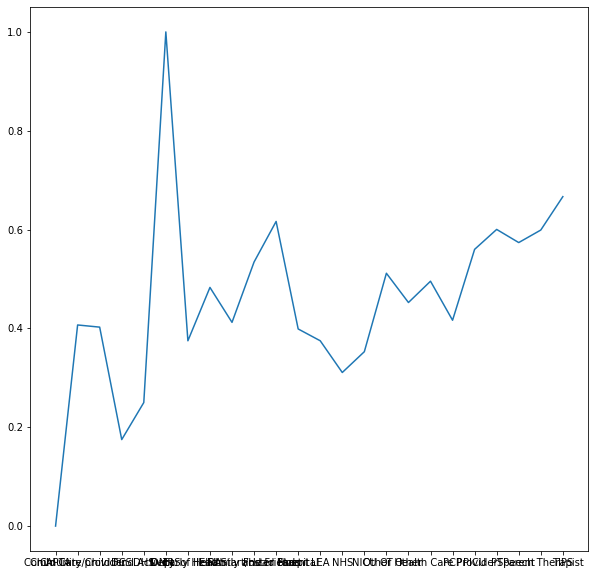

In [70]:
plt.figure(figsize = (10, 10))
plt.plot(total_referrals)
plt.show()

TEIS provides services to eligible infants and toddlers from birth to age 3. Are there any POE or service coordinators with high rates of early closure (a child exiting before reaching age 3)? For this question, only consider cases which have reached the IFSP phase.

In [53]:
teis['DOB/Exit Diff'] = (teis['Exit Date'] - teis['DOB']).dt.days


In [54]:
less_than_3_years = teis[teis['DOB/Exit Diff'] < 1094]


In [59]:
POE_SC_data = less_than_3_years.groupby(['POE', 'Service Coordinator'])['DOB/Exit Diff'].count()

In [60]:
POE_SC_data

POE  Service Coordinator
ET   Aaron Collins           111
     Adrianne McPeake         54
     Amanda Blair             30
     Amanda Cooke            192
     Amanda Cooke - PC         9
                            ... 
UC   Nicole Smith            180
     Sherry Roberts-DS      2052
     Steven Scarlett         259
     Taylor Lee              175
     Taylor Watson            55
Name: DOB/Exit Diff, Length: 397, dtype: int64